# # Getting Started
https://github.com/pytorch/tutorials/blob/master/Deep%20Learning%20with%20PyTorch.ipynb

In [1]:
from __future__ import print_function
import torch

In [70]:
import sys
print (sys.version) 

2.7.12 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:43:17) 
[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]


In [2]:
x = torch.Tensor(5, 3)  # construct a 5x3 matrix, uninitialized

In [4]:
x


1.00000e-35 *
  0.0000  0.0000  0.0000
  0.0000  3.4983  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0168  0.0000  0.0006
[torch.FloatTensor of size 5x3]

In [10]:
x = torch.rand(5, 3)
x


 0.7317  0.6017  0.6400
 0.2539  0.9899  0.9120
 0.6029  0.0205  0.6505
 0.8978  0.3532  0.0569
 0.4470  0.2048  0.9424
[torch.FloatTensor of size 5x3]

In [9]:
x.size()

torch.Size([5, 3])

In [14]:
y = torch.rand(5, 3)
y


 0.3012  0.0575  0.3493
 0.8573  0.4899  0.6179
 0.4680  0.7417  0.1659
 0.1104  0.6285  0.6009
 0.3959  0.8735  0.1025
[torch.FloatTensor of size 5x3]

In [15]:
x + y


 1.0329  0.6592  0.9893
 1.1113  1.4798  1.5299
 1.0709  0.7622  0.8165
 1.0083  0.9817  0.6578
 0.8428  1.0783  1.0448
[torch.FloatTensor of size 5x3]

In [17]:
torch.add(x,y)


 1.0329  0.6592  0.9893
 1.1113  1.4798  1.5299
 1.0709  0.7622  0.8165
 1.0083  0.9817  0.6578
 0.8428  1.0783  1.0448
[torch.FloatTensor of size 5x3]

In [18]:
# addition: giving an output tensor
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)


 1.0329  0.6592  0.9893
 1.1113  1.4798  1.5299
 1.0709  0.7622  0.8165
 1.0083  0.9817  0.6578
 0.8428  1.0783  1.0448
[torch.FloatTensor of size 5x3]

In [19]:
# addition: in-place
y.add_(x) # adds x to y


 1.0329  0.6592  0.9893
 1.1113  1.4798  1.5299
 1.0709  0.7622  0.8165
 1.0083  0.9817  0.6578
 0.8428  1.0783  1.0448
[torch.FloatTensor of size 5x3]

In [20]:
y


 1.0329  0.6592  0.9893
 1.1113  1.4798  1.5299
 1.0709  0.7622  0.8165
 1.0083  0.9817  0.6578
 0.8428  1.0783  1.0448
[torch.FloatTensor of size 5x3]

In [21]:
x[:,1]

#read http://pytorch.org/docs/torch.html


 0.6017
 0.9899
 0.0205
 0.3532
 0.2048
[torch.FloatTensor of size 5]

In [22]:
a = torch.ones(5)
a


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

In [23]:
b = a.numpy()
b

array([ 1.,  1.,  1.,  1.,  1.], dtype=float32)

In [24]:
a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


In [25]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



In [28]:
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y
    print ("hello")

# # AutoGrad

In [29]:
from torch.autograd import Variable

In [30]:
x = Variable(torch.ones(2, 2), requires_grad = True)
x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [31]:
y = x + 2
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [32]:
y.creator
# y was created as a result of an operation, 
# so it has a creator

In [33]:
z = y * y * 3
z

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]

In [34]:
out = z.mean()
out

Variable containing:
 27
[torch.FloatTensor of size 1]

In [35]:
# let's backprop now
out.backward()


In [36]:
# print gradients d(out)/dx
x.grad

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]

In [43]:
x = torch.randn(3)
x = Variable(x, requires_grad = True)

In [44]:
y = x * 2
while y.data.norm() < 1000:
    y = y * 2

In [45]:
y

Variable containing:
-1501.0609
   35.7286
-1124.1694
[torch.FloatTensor of size 3]

In [46]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

In [47]:
x.grad

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]

# # Neural Network

In [48]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120) # an affine operation: y = Wx + b
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) # If the size is a square you can only specify a single number
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
net

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

In [49]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [50]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
out

Variable containing:
1.00000e-02 *
 -4.6163  6.1893  7.2798 -0.3164  5.7744  0.9044  6.0955 -5.6721 -2.0587  6.4093
[torch.FloatTensor of size 1x10]

In [51]:
net.zero_grad() # zeroes the gradient buffers of all parameters
out.backward(torch.randn(1, 10)) # backprops with random gradients


In [52]:
output = net(input)
target = Variable(torch.range(1, 10))  # a dummy target, for example
criterion = nn.MSELoss()
loss = criterion(output, target)
loss

Variable containing:
 38.2916
[torch.FloatTensor of size 1]

In [53]:
target

Variable containing:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
[torch.FloatTensor of size 10]

In [54]:
# For illustration, let us follow a few steps backward
print(loss.creator) # MSELoss
print(loss.creator.previous_functions[0][0]) # Linear
print(loss.creator.previous_functions[0][0].previous_functions[0][0]) # ReLU

In [55]:
# now we shall call loss.backward(), and have a look at conv1's bias gradients before and after the backward.
net.zero_grad() # zeroes the gradient buffers of all parameters
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
  4.6880
 -9.4879
  0.2471
  2.9351
 -2.3627
 -3.2208
[torch.FloatTensor of size 6]



In [56]:

import torch.optim as optim
# create your optimizer
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# in your training loop:
optimizer.zero_grad() # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # Does the update

# # CIFAR10

In [57]:
import torchvision
import torchvision.transforms as transforms

# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting tar file
Done!
Files already downloaded and verified


In [58]:
# functions to show an image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

/Users/nahmad/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')



 0
 8
 6
 9
[torch.LongTensor of size 4]

plane  ship  frog truck


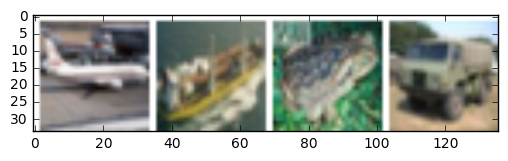

In [74]:
# show some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# print images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [61]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120) # an affine operation: y = Wx + b
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) # If the size is a square you can only specify a single number
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
net

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

In [62]:
criterion = nn.CrossEntropyLoss() # use a Classification Cross-Entropy loss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [76]:

for epoch in range(2): # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()        
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 1.241
[1,  4000] loss: 1.235
[1,  6000] loss: 1.195
[1,  8000] loss: 1.206
[1, 10000] loss: 1.180
[1, 12000] loss: 1.186
[2,  2000] loss: 1.102
[2,  4000] loss: 1.131
[2,  6000] loss: 1.110
[2,  8000] loss: 1.128
[2, 10000] loss: 1.120
[2, 12000] loss: 1.083
Finished Training


GroundTruth:    cat  ship  ship plane


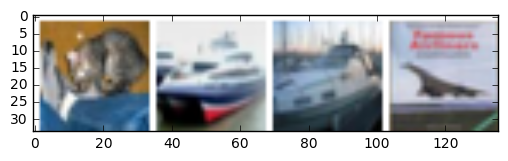

In [64]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [65]:
outputs = net(Variable(images))

# the outputs are energies for the 10 classes. 
# Higher the energy for a class, the more the network 
# thinks that the image is of the particular class

# So, let's get the index of the highest energy
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s'% classes[predicted[j][0]] for j in range(4)))

Predicted:    cat  ship   car  ship


In [66]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [67]:

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1

In [68]:
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 45 %
Accuracy of   car : 68 %
Accuracy of  bird : 35 %
Accuracy of   cat : 42 %
Accuracy of  deer : 45 %
Accuracy of   dog : 28 %
Accuracy of  frog : 78 %
Accuracy of horse : 56 %
Accuracy of  ship : 77 %
Accuracy of truck : 58 %


In [ ]:
# if gpu is available this will make it run on gpu
net.cuda()